### Chebyshev's Inequality

If we know that a random variable is Normally distributed (mean and std given), we can simply apply 68-95-99.7% rule on it.
But what if the random variable isn't Normally distributed or the distribution is unknown, but mean and std are provided (non-zero and finite) ?

We can inference:
- x% of values lie between μ + 2σ and μ - 2σ, how to find the x%?

Chebyshev Inequality states:
- P ( | x - μ | >= kσ ) <= 1 / k**2 such that k is constant; number of std dev away.
- More simpler way:  P ( μ -  kσ  < x < μ + kσ ) > 1 - 1 / k**2

In [1]:
# example 
mean = 40000
std_d = 10000

# what percentage lies between μ + 2σ and μ - 2σ (20000,60000) ; k = 2
# using the inequality theorem
k = 2
prob = (1 - 1 / k**2)*100
print("Probabilty that percentage lies between μ + 2σ and μ - 2σ is greater than or equals to {}%".format(prob))

Probabilty that percentage lies between μ + 2σ and μ - 2σ is greater than or equals to 75.0%


### Bernoulli Distribution

- Discrete Distribution
- Used when there are two outcomes for example coin toss example
- first probabilty value p, second q = 1 - p  and p + q = 1
- X~Bernoulli( p=0.5 ) where 0 < p < 1

### Binomial Distribution

- Discrete distribution
- For example, we have X~Bernoulli( p=0.5 ) -  coin toss example. We toss this coin 10 times. Number of times we get head when we toss a coin N times is rv Y ; N=10.
- Therefore Y~Binomial(n,p) where n=N (number of trials) and p = probability from Bernoulli distribution

### Log-Normal Distribution

- Random Variable X is logNormal if log(X) or ln(X) is normally distributed.
- X~logNormal(μ,σ)
- As the std_d increases, PDF tends to get more skewed towards right.

1. Used in:- Human behaviours; internet comments, time reading internet blogs.
2. Biology and Medicine, Social Sciences, Economics (income).

Most ML algorithms are designed for Normal Distribution; how to convert logN to N?
- By doing ln(X), converted to Normal Distribution!.

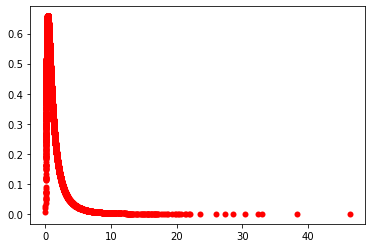

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# generating lognormal distribution
x_logN = np.random.lognormal(mean=0, sigma=1,size=10000)

# finding pdf to plot it
pdf = (np.exp(-(np.log(x_logN) - 0)**2 / (2 * 1**2))
       /(x_logN * 1 * np.sqrt(2 * np.pi)))

# plot
plt.scatter(x_logN,pdf,color='r',linewidths=0.01)
plt.show()

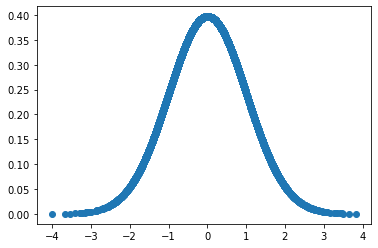

In [3]:
# converting log-normal to normal

# taking natural log
norm = [np.log(i) for i in x_logN]

# finding pdf
pdf = 1/(np.std(norm) * np.sqrt(2 * np.pi)) * np.exp( - (norm - np.mean(norm))**2 / (2 * np.std(norm)**2))

#plot
plt.scatter(norm,pdf)
plt.show()

### Power Law and Pareto Distribution

- Let two variables x,y(probability). In top 80% values are in the interval of top 20% x variables.
- Whenever a distribution follows power law, its Pareto Distribution.
- To check if the distribution is power law, log-log plots are used (logX,logY). Plotting them gives a straight line.
- QQ plots can also be used.

### Box-Cox Transformation

- Any way to convert Pareto dist to Guassian dist?
1. Assume a rv X~Pareto distributed, X : [ x1,x2....xn ]
2. When these X passed in box-cox function, it returns a value lambda.
3. Using alpha, we can get yi = (xi**lambda)-1/lambda if lambda != 0 OR log(xi) if lambda == 0

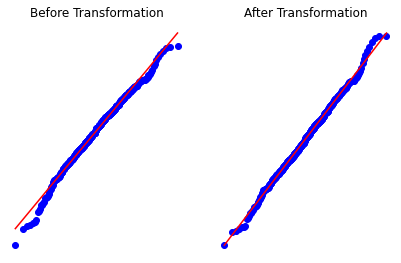

In [4]:
# boxcox using scipy
import numpy as np
import pylab
import matplotlib.pyplot as plt
from scipy.stats import boxcox,probplot,loggamma

# generating a log-gamma dist
x = loggamma.rvs(5, size=500)+5

#boxcox transformation
y,_ = boxcox(x)

# verify using QQ plot if y is normally dist after transormation
fig = plt.figure()
ax1 = fig.add_subplot(121)
plot = probplot(x,dist='norm',plot=ax1)
ax1.set_title("Before Transformation")
ax1.set_xlabel("")
ax1.set_ylabel("")

ax2 = fig.add_subplot(122)
probplot(y,dist='norm',plot=ax2)
ax2.set_title("After Transformation")
ax2.set_xlabel("")
ax2.set_ylabel("")


fig.tight_layout()
ax1.axis('off')
ax2.axis('off')
pylab.show()